<a href="https://colab.research.google.com/github/Kardee12/GitHubGraduation-2021/blob/main/HomeworkSubmission9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 9 submission</b></u>

### Roster Name: Karthik Manishankar
### Preferred Name (if different): Chosen Name
### Student ID: 015712086
### Email address: karthik.manishankar@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

Code examples from Autoencoder.MNIST

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from random import randint
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from PIL import Image
from tensorflow.keras import regularizers
from tensorflow.keras import backend
from datetime import datetime

In [2]:
np.random.seed(42)

#### Code the solution

**Problem #1**

In [3]:
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape

# Reshape the images into flat ANN layers
x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train.shape, x_validation.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [5]:
input_layer = Input(shape=(784,))   # 28*28

encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)
# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)

# encoder model:
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(128,))
decoder_layer = autoencoder.layers[-1]  # last layer of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 7s 210ms/step - loss: 0.5994 - val_loss: 0.4926
Epoch 2/30
24/24 [==============================] - 5s 198ms/step - loss: 0.4409 - val_loss: 0.4018
Epoch 3/30
24/24 [==============================] - 3s 102ms/step - loss: 0.3841 - val_loss: 0.3727
Epoch 4/30
24/24 [==============================] - 3s 106ms/step - loss: 0.3633 - val_loss: 0.3557
Epoch 5/30
24/24 [==============================] - 3s 105ms/step - loss: 0.3477 - val_loss: 0.3426
Epoch 6/30
24/24 [==============================] - 2s 104ms/step - loss: 0.3352 - val_loss: 0.3323
Epoch 7/30
24/24 [==============================] - 2s 103ms/step - loss: 0.3264 - val_loss: 0.3252
Epoch 8/30
24/24 [==============================] - 3s 126ms/step - loss: 0.3203 - val_loss: 0.3198
Epoch 9/30
24/24 [==============================] - 3s 137ms/step - loss: 0.3158 - val_loss: 0.3166
Epoch 10/30
24/24 [==============================] - 2s 104ms/step - loss: 0.3133 - val_loss: 0.3141

313/313 [==============================] - 1s 3ms/step


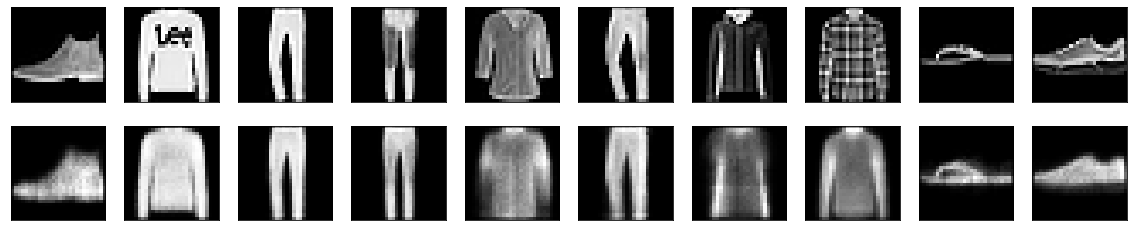

In [7]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Problem #2**

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)
x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [10]:
input_layer = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248

In [11]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/30
24/24 [==============================] - 132s 5s/step - loss: 0.5505 - val_loss: 0.3785
Epoch 2/30
24/24 [==============================] - 135s 6s/step - loss: 0.3533 - val_loss: 0.3349
Epoch 3/30
24/24 [==============================] - 130s 5s/step - loss: 0.3287 - val_loss: 0.3231
Epoch 4/30
24/24 [==============================] - 133s 6s/step - loss: 0.3200 - val_loss: 0.3169
Epoch 5/30
24/24 [==============================] - 130s 5s/step - loss: 0.3151 - val_loss: 0.3130
Epoch 6/30
24/24 [==============================] - 132s 6s/step - loss: 0.3120 - val_loss: 0.3104
Epoch 7/30
24/24 [==============================] - 131s 5s/step - loss: 0.3093 - val_loss: 0.3083
Epoch 8/30
24/24 [==============================] - 131s 5s/step - loss: 0.3079 - val_loss: 0.3079
Epoch 9/30
24/24 [==============================] - 132s 5s/step - loss: 0.3063 - val_loss: 0.3056
Epoch 10/30
24/24 [==============================] - 130s 5s/step - loss: 0.3047 - val_loss: 0.3038
Epoch 11/

313/313 [==============================] - 8s 25ms/step


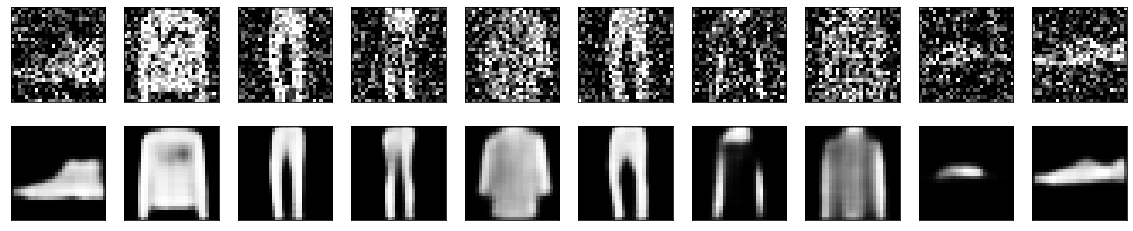

In [13]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()